In [1]:
library(tidyverse)
source("stocks_helper_functions.R")

── Attaching core tidyverse packages ──────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
Berg_sample_data <- tibble::tribble(
                      ~site_id,   ~core_id, ~depth_min, ~depth_max, ~dry_bulk_density, ~fraction_organic_matter,
                        "Berg", "Berg2_C1",          0,          5,            1.0924,                    0.234,
                        "Berg", "Berg2_C1",          5,         10,            1.2451,                    0.003,
                        "Berg", "Berg2_C1",         10,         20,           1.28512,                    0.074,
                        "Berg", "Berg2_C1",         20,         30,           1.31188,                    0.138,
                        "Berg", "Berg2_C1",         30,         50,           1.30858,                    0.202,
                        "Berg", "Berg2_C2",          0,          5,  1.80816666666667,                    0.095,
                        "Berg", "Berg2_C2",          5,         10,            1.9218,                    0.083,
                        "Berg", "Berg2_C2",         10,         20,           1.42038,                    0.192,
                        "Berg", "Berg2_C2",         20,         30,           1.30294,                    0.061,
                        "Berg", "Berg2_C2",         30,         50,           1.26856,                    0.222,
                        "Berg", "Berg2_C3",          0,          5,  1.83173333333333,                    0.155,
                        "Berg", "Berg2_C3",          5,         10,           1.92015,                    0.047,
                        "Berg", "Berg2_C3",         10,         20,           1.35172,                    0.068,
                        "Berg", "Berg2_C3",         20,         30,            1.3361,                    0.055,
                        "Berg", "Berg2_C3",         30,         50,           1.36132,                    0.011,
                        "Berg", "Berg2_C4",          0,          5,  1.10342857142857,                    0.035,
                        "Berg", "Berg2_C4",          5,         10,            1.2454,                    0.089,
                        "Berg", "Berg2_C4",         10,         20,            1.2553,                    0.081,
                        "Berg", "Berg2_C4",         20,         30,           1.32318,                    0.088,
                        "Berg", "Berg2_C4",         30,         50,           1.36486,                    0.113
  )

In [3]:
(data_cols <- dput(colnames(Berg_sample_data)))

c("site_id", "core_id", "depth_min", "depth_max", "dry_bulk_density", 
"fraction_organic_matter")


[1] "site_id"                 "core_id"                
[3] "depth_min"               "depth_max"              
[5] "dry_bulk_density"        "fraction_organic_matter"

In [12]:
(Interpolated15cm <-    Berg_sample_data |>
                        dplyr::group_by(site_id, core_id) |>
                        dplyr::summarise(dry_bulk_density = interpolate_slice(pick(depth_max, dry_bulk_density), 15),
                                        fraction_organic_matter = interpolate_slice(pick(depth_max, fraction_organic_matter), 15), 
                                        depth_min = max(depth_max[depth_max <= 15], na.rm = TRUE),
                                        depth_max = 15) |>
                        dplyr::ungroup() |>
                        dplyr::select(site_id, core_id, depth_min, depth_max, dry_bulk_density, fraction_organic_matter))

`summarise()` has grouped output by 'site_id'. You can override using the `.groups` argument.


site_id,core_id,depth_min,depth_max,dry_bulk_density,fraction_organic_matter
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Berg,Berg2_C1,10,15,1.218554,0.11803125
Berg,Berg2_C2,10,15,1.659493,0.11150000
Berg,Berg2_C3,10,15,1.659454,0.08546875
Berg,Berg2_C4,10,15,1.219086,0.07096875


Saving 3.33 x 3.33 in image


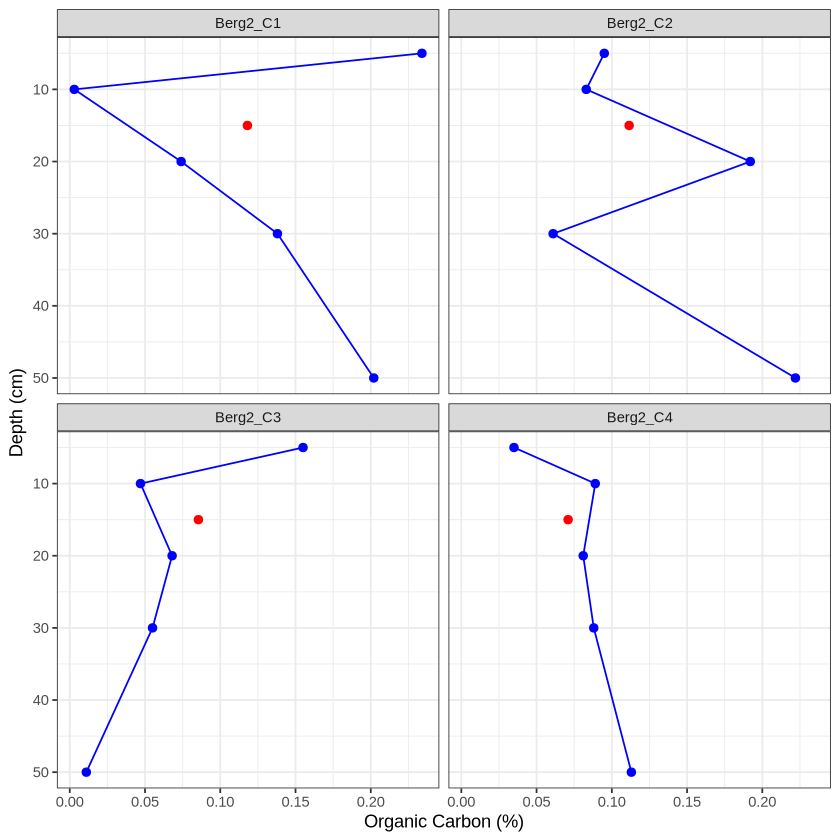

In [6]:
ggplot() +
      geom_point(data = Berg_sample_data, size = 2, aes(y = fraction_organic_matter, x = depth_max), color = "blue") +
      geom_line(data = Berg_sample_data, aes(y = fraction_organic_matter, x = depth_max), color = "blue") +
      geom_point(data = Interpolated15cm, size = 2, aes(y = fraction_organic_matter, x = depth_max), color = "red") +
      scale_x_reverse() +
      labs(x =  "Depth (cm)", y = "Organic Carbon (%)", color = "Legend") +
      facet_wrap(~core_id) +
      coord_flip() +
      theme_bw() 

ggsave("../plots/fraction_organic_matter_interpolation.png", scale = 0.5 )

Saving 3.33 x 3.33 in image


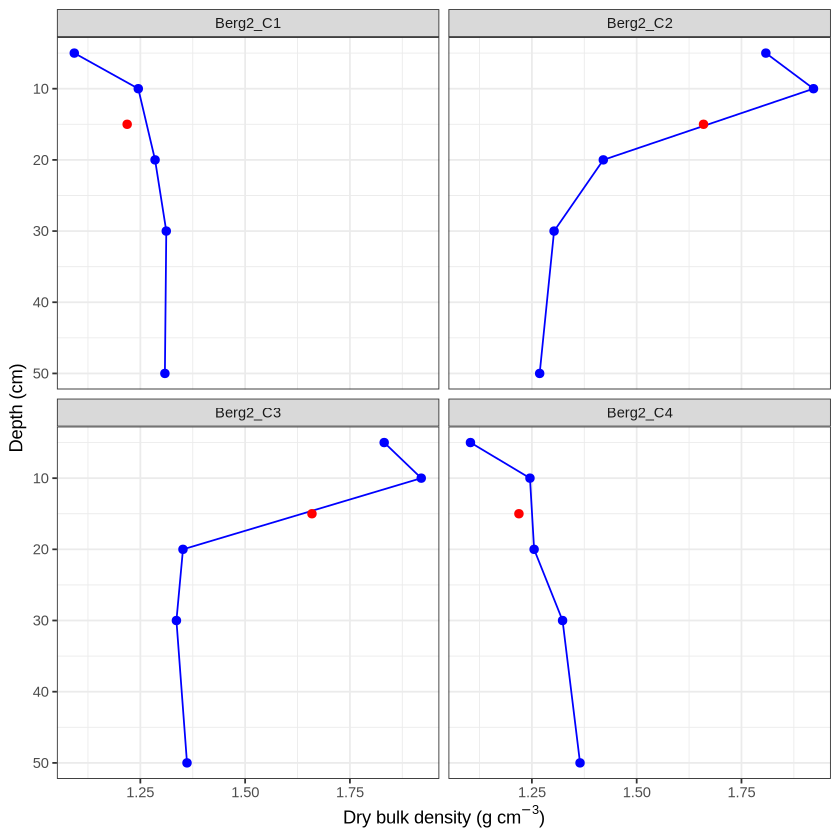

In [7]:
ggplot() +
      geom_point(data = Berg_sample_data, size = 2, aes(y = dry_bulk_density, x = depth_max), color = "blue") +
      geom_line(data = Berg_sample_data, aes(y = dry_bulk_density, x = depth_max), color = "blue") +
      geom_point(data = Interpolated15cm, size = 2, aes(y = dry_bulk_density, x = depth_max), color = "red") +
      scale_x_reverse() +
      labs(x = "Depth (cm)", y = expression("Dry bulk density (g cm"^-3*")")) +
      facet_wrap(~core_id) +
      coord_flip() +
      theme_bw() 

ggsave("../plots/dry_bulk_density_interpolation.png", scale = 0.5)

In [8]:
Extropolated100cm <- Berg_sample_data |>
                     dplyr::group_by(site_id, core_id) |>
                     dplyr::summarise(dry_bulk_density = predict_val(pick(depth_max, dry_bulk_density), 100),
                                    fraction_organic_matter = predict_val(pick(depth_max, fraction_organic_matter), 100),
                                    depth_min = max(depth_max[depth_max <= 100], na.rm = TRUE),
                                    depth_max = 100) |>
                     dplyr::ungroup() |>
                     dplyr::select(site_id, core_id, depth_min, depth_max, dry_bulk_density, fraction_organic_matter)

`summarise()` has grouped output by 'site_id'. You can override using the `.groups` argument.


Saving 3.33 x 3.33 in image


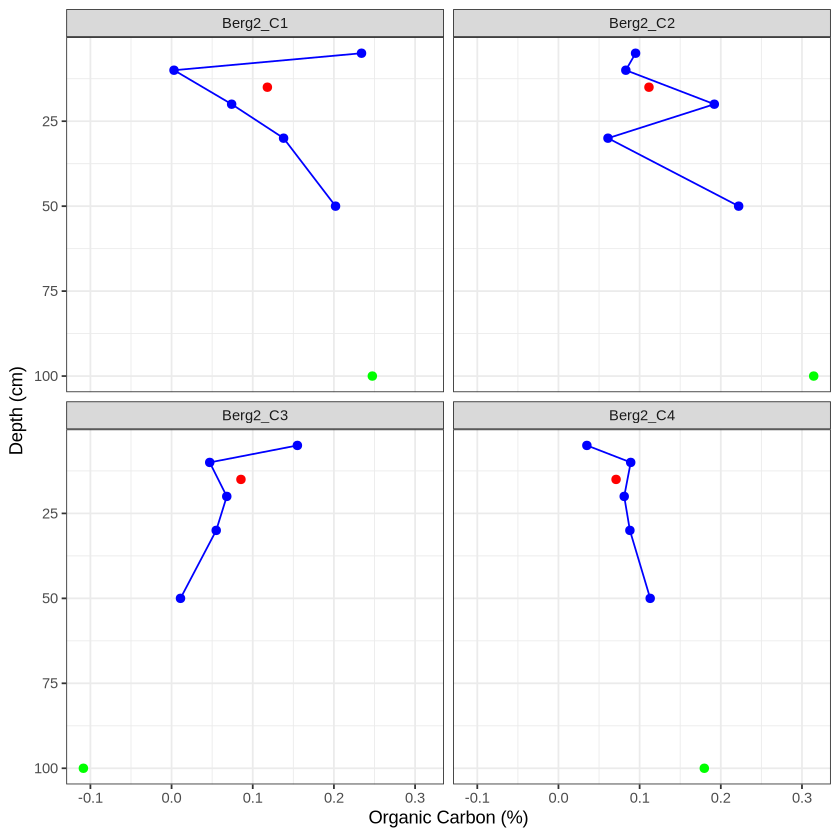

In [9]:
ggplot() +
      geom_point(data = Berg_sample_data, size = 2, aes(y = fraction_organic_matter, x = depth_max), color = "blue") +
      geom_line(data = Berg_sample_data, aes(y = fraction_organic_matter, x = depth_max), color = "blue") +
      geom_point(data = Interpolated15cm, size = 2, aes(y = fraction_organic_matter, x = depth_max), color = "red") +
      geom_point(data = Extropolated100cm, size = 2, aes(y = fraction_organic_matter, x = depth_max), color = "green") +
      scale_x_reverse() +
      labs(x = "Depth (cm)", y = expression("Organic Carbon (%)")) +
      facet_wrap(~core_id) +
      coord_flip() +
      theme_bw() 

ggsave("../plots/fraction_organic_matter100.png", scale = 0.5)

In [10]:
Berg_sample_data$data_type <- "Measured"
Interpolated15cm$data_type <- "Interpolated"
Extropolated100cm$data_type <- "Extrapolated"

In [11]:
rbind(Berg_sample_data, Interpolated15cm, Extropolated100cm)

site_id,core_id,depth_min,depth_max,dry_bulk_density,fraction_organic_matter,data_type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Berg,Berg2_C1,0,5,1.0924000,0.23400000,Measured
Berg,Berg2_C1,5,10,1.2451000,0.00300000,Measured
Berg,Berg2_C1,10,20,1.2851200,0.07400000,Measured
Berg,Berg2_C1,20,30,1.3118800,0.13800000,Measured
Berg,Berg2_C1,30,50,1.3085800,0.20200000,Measured
Berg,Berg2_C2,0,5,1.8081667,0.09500000,Measured
Berg,Berg2_C2,5,10,1.9218000,0.08300000,Measured
Berg,Berg2_C2,10,20,1.4203800,0.19200000,Measured
Berg,Berg2_C2,20,30,1.3029400,0.06100000,Measured
